In [15]:
# Import all the necessary tooling
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import pandas as pd
import numpy as np
import seaborn as sns 
# Matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
def create_linechart(result_fit):
    # Generate a line chart of the training process
    history = result_fit.history
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
(1034, 500, 500, 3)
<class 'numpy.ndarray'>


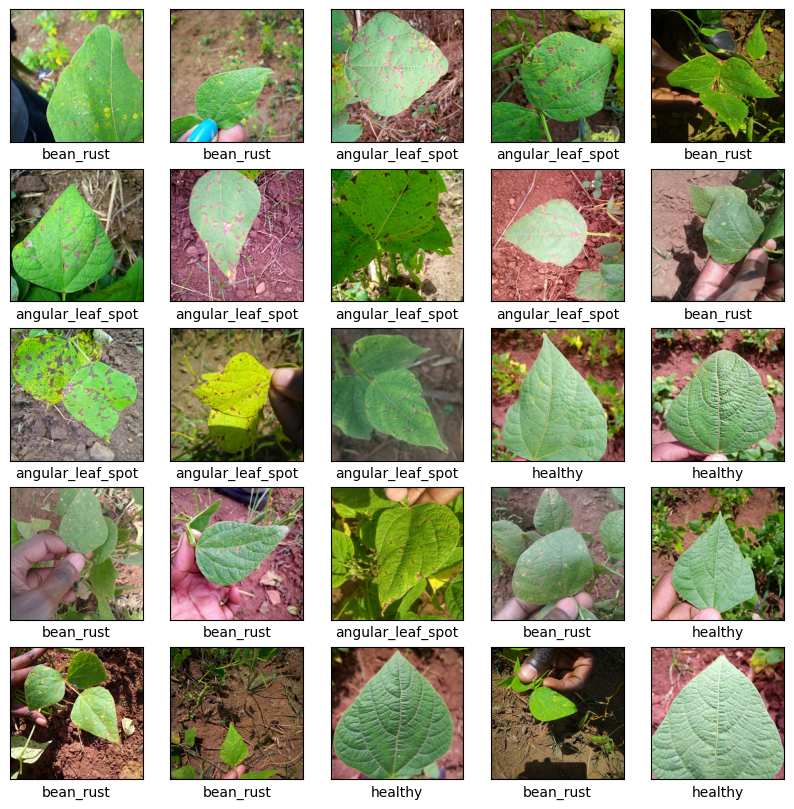

In [3]:
dataset, info = tfds.load("beans", with_info=True)

train_dataset = dataset['train']
train_dataset.image_size=(500, 500),

print(type(train_dataset))
validation_dataset = dataset['validation']
validation_dataset.image_size=(500, 500),
test_dataset = dataset['test']
labelsAsText = ['angular_leaf_spot', 'bean_rust', 'healthy']
trainList = list(train_dataset)
X_train = np.array(list(map(lambda x: x['image'], train_dataset)))
Y_train = np.array(list(map(lambda x: x['label'], train_dataset)))

X_val = np.array(list(map(lambda x: x['image'], validation_dataset)))
Y_val = np.array(list(map(lambda x: x['label'], validation_dataset)))

X_test = np.array(list(map(lambda x: x['image'], test_dataset)))
Y_test = np.array(list(map(lambda x: x['label'], test_dataset)))


print(X_train.shape)
plt.figure(figsize=(10,10))
for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labelsAsText[Y_train[i]])

print(type(X_train))




Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.3886 - loss: 2.5639 - val_accuracy: 0.5489 - val_loss: 0.8109
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5765 - loss: 0.9170 - val_accuracy: 0.5188 - val_loss: 0.8876
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.6793 - loss: 0.7678 - val_accuracy: 0.6541 - val_loss: 0.6908
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.7066 - loss: 0.7022 - val_accuracy: 0.6842 - val_loss: 0.6559
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7639 - loss: 0.5855 - val_accuracy: 0.7368 - val_loss: 0.5294
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.8404 - loss: 0.4134 - val_accuracy: 0.7368 - val_loss: 0.5735
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.8589 - loss: 0.3551 - val_accuracy: 0.7143 - val_loss: 0.6747
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.9164 - loss: 0.2260 - val_accuracy: 0.7143 - val_loss:

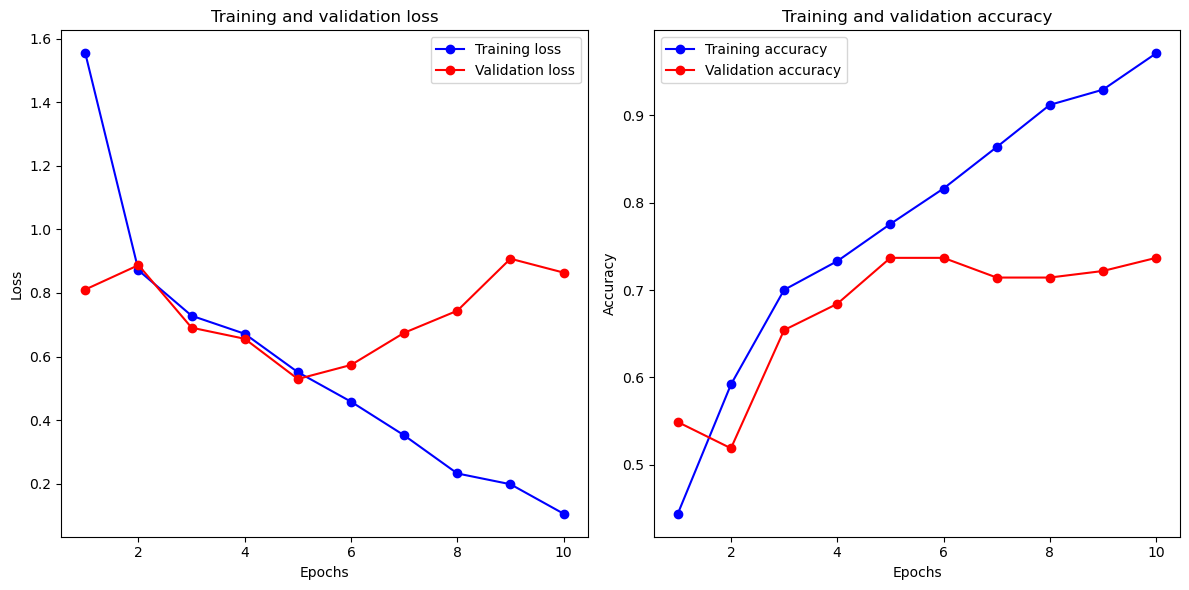

In [4]:

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
vals_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
result_fit = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10)


test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit=result_fit)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.4183 - loss: 2.4378 - val_accuracy: 0.6617 - val_loss: 0.8551
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.5951 - loss: 0.9359 - val_accuracy: 0.7669 - val_loss: 0.6431
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.6945 - loss: 0.6907 - val_accuracy: 0.7669 - val_loss: 0.6279
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7450 - loss: 0.6390 - val_accuracy: 0.7594 - val_loss: 0.5976
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7633 - loss: 0.5954 - val_accuracy: 0.6391 - val_loss: 0.7709
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7354 - loss: 0.6250 - val_accuracy: 0.6917 - val_loss: 0.5704
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.7508 - loss: 0.5952 - val_accuracy: 0.7218 - val_loss: 0.6204
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.8068 - loss: 0.4988 - val_accuracy: 0.8120 - val_loss:

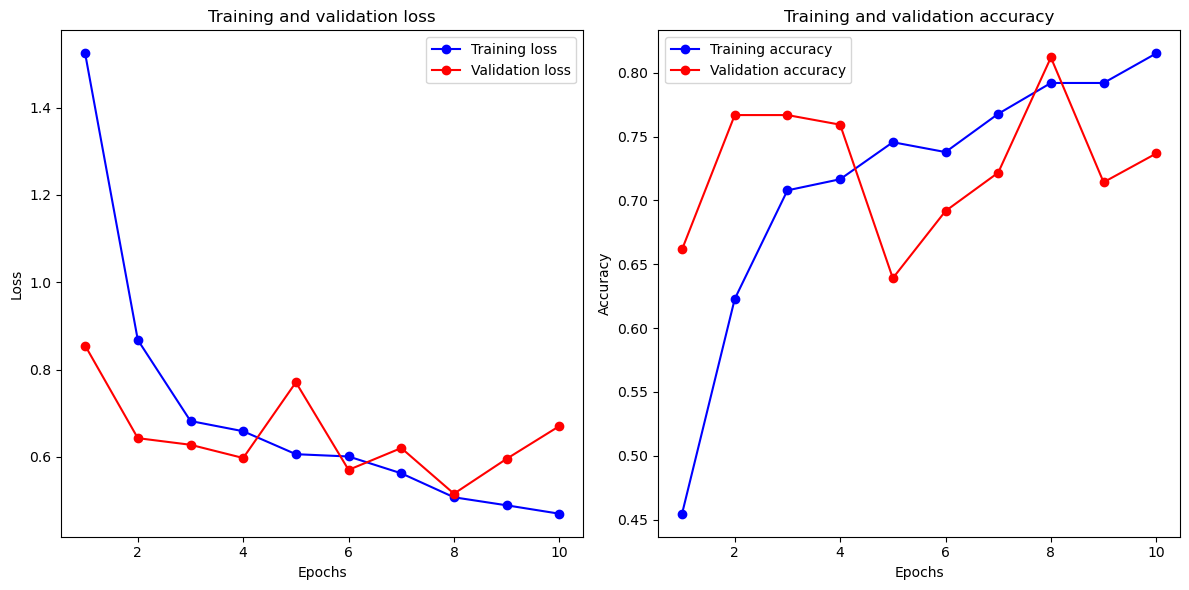

In [7]:
# Met data augmentation
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
result_fit = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10)


test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit=result_fit)

Confusion matrix:


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 643ms/step


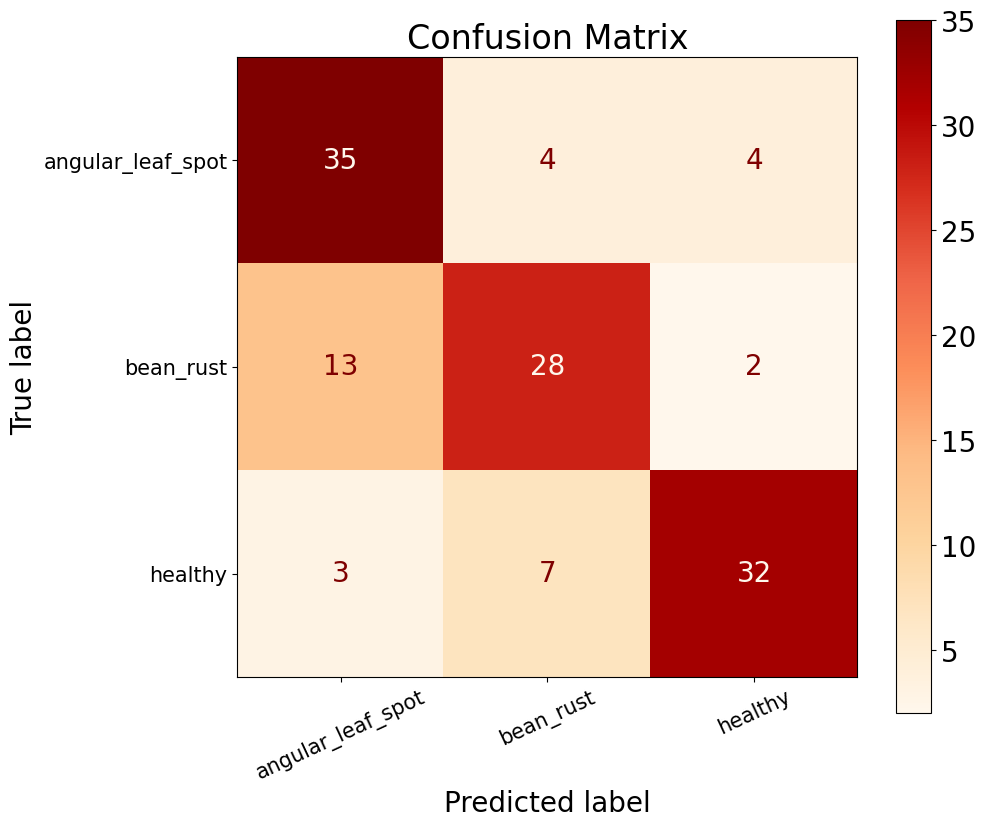

In [17]:
# Get predictions for test data
y_pred = model.predict(X_test)

# Convert predicted labels to integers (assuming categorical labels)
y_pred = np.argmax(y_pred, axis=1)


c_m = confusion_matrix(Y_test, y_pred)

# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labelsAsText)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()